In [499]:
# 1. Import thư viện
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [500]:
# 2. Đọc file excel và gắn index với giá Price
# df = pd.read_excel('VCB.xlsx')
# df = pd.read_excel('ACB.xlsx')
df = pd.read_excel('MBB.xlsx')


In [501]:
print(df.dtypes)

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %           float64
dtype: object


In [502]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-22,18300.0,18150.0,18450.0,18100.0,8.55M,0.0083
1,2023-12-21,18150.0,18100.0,18150.0,18000.0,3.98M,0.0000
2,2023-12-20,18150.0,18150.0,18200.0,18050.0,3.09M,0.0000
3,2023-12-19,18150.0,18000.0,18200.0,17950.0,5.90M,0.0083
4,2023-12-18,18000.0,18050.0,18150.0,17950.0,5.28M,-0.0028
...,...,...,...,...,...,...,...
1245,2018-12-28,9324.6,9540.3,9540.3,9324.6,10.96M,-0.0127
1246,2018-12-27,9444.5,9588.3,9636.2,9372.5,10.75M,0.0051
1247,2018-12-26,9396.5,9468.4,9540.3,9396.5,5.48M,-0.0051
1248,2018-12-25,9444.5,9516.4,9636.2,9276.7,20.83M,-0.0367


In [503]:
df1=df.reset_index()['Price']

In [504]:
df1

0       18300.0
1       18150.0
2       18150.0
3       18150.0
4       18000.0
         ...   
1245     9324.6
1246     9444.5
1247     9396.5
1248     9444.5
1249     9804.0
Name: Price, Length: 1250, dtype: float64

In [505]:
#đảo ngược dữ liệu
df1=df1.loc[::-1].reset_index(drop=True)
df=df.loc[::-1].reset_index(drop=True)

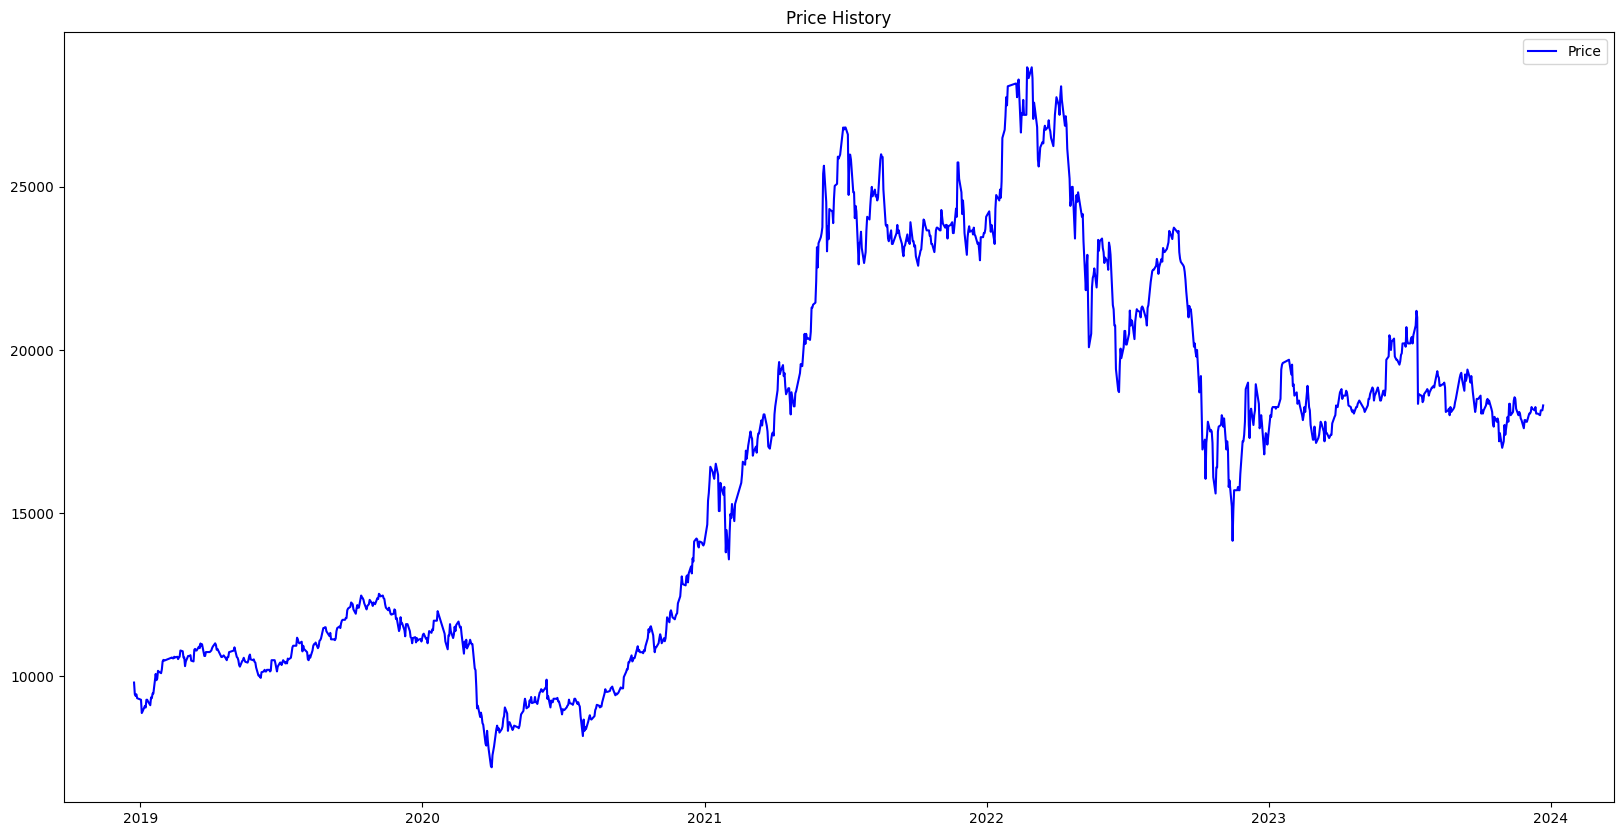

In [506]:
#vẽ biểu đồ giá đóng cửa theo thời gian
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['Price'], color='blue', label='Price')
plt.legend(loc='best') #tự động xác định vị trí tốt nhất để đặt chú thích
plt.title('Price History')
plt.show()

In [507]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [508]:
df1

array([[0.12103392],
       [0.1042819 ],
       [0.10204519],
       ...,
       [0.50994171],
       [0.50994171],
       [0.51693142]])

In [509]:
# # # 4. Chia train val test 9 - 1 

# train_size = int(0.9 * len(df1))
# test_size = len(df1) - train_size

# train_data = df1[:train_size]
# test_data = df1[train_size:]


In [510]:
# # 4. Chia train val test 8-2

# train_size = int(0.8 * len(df1))
# test_size = len(df1) - train_size

# train_data = df1[:train_size]
# test_data = df1[train_size:]


In [511]:
# # 4. Chia train val test 7-3 

train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]


Tiếp theo, ta cần tiến hành huấn luyện mô hình với thuật toán SVR. Ta có thể sử dụng GridSearchCV để tìm kiếm các tham số tối ưu cho mô hình.

In [512]:
# 5. Hàm Create Dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [513]:
#6. Thiết lập tham số cho model

look_back = 30 
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [514]:

# In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# In ra dòng đầu tiên của dữ liệu
print(X_train[0])  # Hoặc print(X_test[0]) tùy thuộc vào tập dữ liệu bạn muốn kiểm tra
print(X_test[0])

# Ta thấy dòng cuối cùng của X_train[0] tương ứng với y_train[0]




(844, 30) (844,)
(344, 30) (344,)
[0.12103392 0.1042819  0.10204519 0.1042819  0.09869479 0.09646274
 0.07747401 0.07970606 0.08752522 0.08529317 0.09646274 0.09646274
 0.09422603 0.08864358 0.09981314 0.09869479 0.10539559 0.10539559
 0.13332184 0.12438432 0.12662103 0.1377906  0.13667224 0.13444019
 0.14002265 0.15119221 0.15342892 0.15231057 0.15677933 0.15566097]
[0.62332888 0.6039161  0.6039161  0.61944725 0.65245269 0.63109678
 0.63886468 0.63692154 0.61167935 0.63692154 0.64662793 0.65439583
 0.65245269 0.65051421 0.64274631 0.65633897 0.65827745 0.65633897
 0.64468945 0.64080316 0.63109678 0.65633897 0.6602206  0.69322603
 0.70099394 0.70876184 0.71070032 0.71070032 0.71652509 0.72623613]


In [515]:
#7. Xây dựng model SVR
#Khởi tạo model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

clf = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = np.logspace(-3, 3, 10) #tạo ra 10 giá trị trong khoảng từ 10^-3 đến 10^3
gamma_range = np.logspace(-3, 3, 10) #tạo ra 10 giá trị trong khoảng từ 10^-3 đến 10^3
kernel_range = ['rbf', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(clf, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.062 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.207 total time=   0.0s
[CV 5/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.315 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.005 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.011 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.005 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.008 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.011 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.063 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.00

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [516]:
#In ra tham số tốt nhất
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_) #giá trị này được tính bằng cách lấy âm của MSE

{'C': 215.44346900318823, 'gamma': 0.004641588833612777, 'kernel': 'sigmoid'}
SVR(C=215.44346900318823, gamma=0.004641588833612777, kernel='sigmoid')
-0.001336403623642709


In [517]:
#9. Dự báo dữ liệu test
y_pred = model.predict(X_test)


In [518]:

from sklearn.metrics import mean_absolute_error

# Tính MAE cho tập test
test_mae = mean_absolute_error(y_pred, y_test)

# Tính RMSE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAPE cho tập test
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('Test MAE:', test_mae)
print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)


Test MAE: 0.01912746150694058
Test RMSE: 0.02637501050634156
Test MAPE: 3.7459348700528166


Sử dụng mô hình đã huấn luyện để dự đoán giá trị Price của 30 ngày tiếp theo bằng cách sử dụng phương thức predict():

Tạo tập dữ liệu giả cho các dự đoán trong tương lai

In [519]:
#Lấy ra 30 ngày cuối cùng của dữ liệu theo thứ tự thời gian của giá trị 'Close'
last_data = np.array(df['Price'].tail(look_back))
print(last_data.shape)

# Reshape last_data để có kích thước (1, lookback)
last_data = last_data.reshape((1, look_back))
future_days = 30

#tạo mảng chứa 30 ngày tiếp theo
future_pred = []

#tạo vòng lặp dự đoán 30 ngày tiếp theo
for i in range(future_days):
    # Dự đoán giá chứng khoán cho ngày tiếp theo sử dụng dữ liệu của last_data
    next_day_prediction = model.predict(last_data)[0]
    # Thêm giá dự đoán được vào mảng furture_pred
    future_pred.append(next_day_prediction)
    # Cập nhật lại last_data bằng cách bỏ giá trị đầu tiên và thêm giá dự đoán của ngày tiếp theo vào cuối mảng last_data
    last_data = np.append(last_data[:, 1:], [[next_day_prediction]], axis=1)
    last_data = last_data.reshape((1, look_back))
    print("{} day output {}".format(i, next_day_prediction))


(30,)
0 day output 0.04298962345438394
1 day output 0.04298962345438394
2 day output 0.04298962345438394
3 day output 0.04298962345438394
4 day output 0.04298962345438394
5 day output 0.04298962345438394
6 day output 0.04298962345438394
7 day output 0.04298962345438394
8 day output 0.04298962345438394
9 day output 0.04298962345438394
10 day output 0.04298962345438394
11 day output 0.04298962345438394
12 day output 0.04298962345438394
13 day output 0.04298962345438394
14 day output 0.04298962345438394
15 day output 0.04298962345438394
16 day output 0.04298962345438394
17 day output 0.04298962345438394
18 day output 0.04298962345438394
19 day output 0.04298962345438394
20 day output 0.04298962345438394
21 day output 0.04298962345438394
22 day output 0.04298962345438394
23 day output 0.04298962345438394
24 day output 0.04298962345438394
25 day output 0.04298962345438394
26 day output 0.04298962345438394
27 day output 0.04298962345438394
28 day output 0.04298962345438394
29 day output 0.04

In [520]:
last_data

array([[0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
        0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
        0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
        0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
        0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
        0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962]])

In [521]:
future_pred = np.array(future_pred)

In [522]:
# #tạo mảng chứa 30 ngày tiếp theo
# future_pred = []

# #tạo vòng lặp dự đoán 30 ngày tiếp theo
# for i in range(future_days):
#     # Dự đoán giá chứng khoán cho ngày tiếp theo sử dụng dữ liệu của last_data
#     next_day_prediction = model.predict(last_data)[0]
#     # Thêm giá dự đoán được vào mảng furture_pred
#     future_pred.append(next_day_prediction)
#     # Cập nhật lại last_data bằng cách bỏ giá trị đầu tiên và thêm giá dự đoán của ngày tiếp theo vào cuối mảng last_data
#     last_data = np.append(last_data[:, 1:], [[next_day_prediction]], axis=1)
#     last_data = last_data.reshape((1, look_back))
#     print("{} day output {}".format(i, next_day_prediction))


In [523]:
future_pred = np.array(future_pred)

In [524]:
future_pred

array([0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
       0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
       0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
       0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
       0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962,
       0.04298962, 0.04298962, 0.04298962, 0.04298962, 0.04298962])

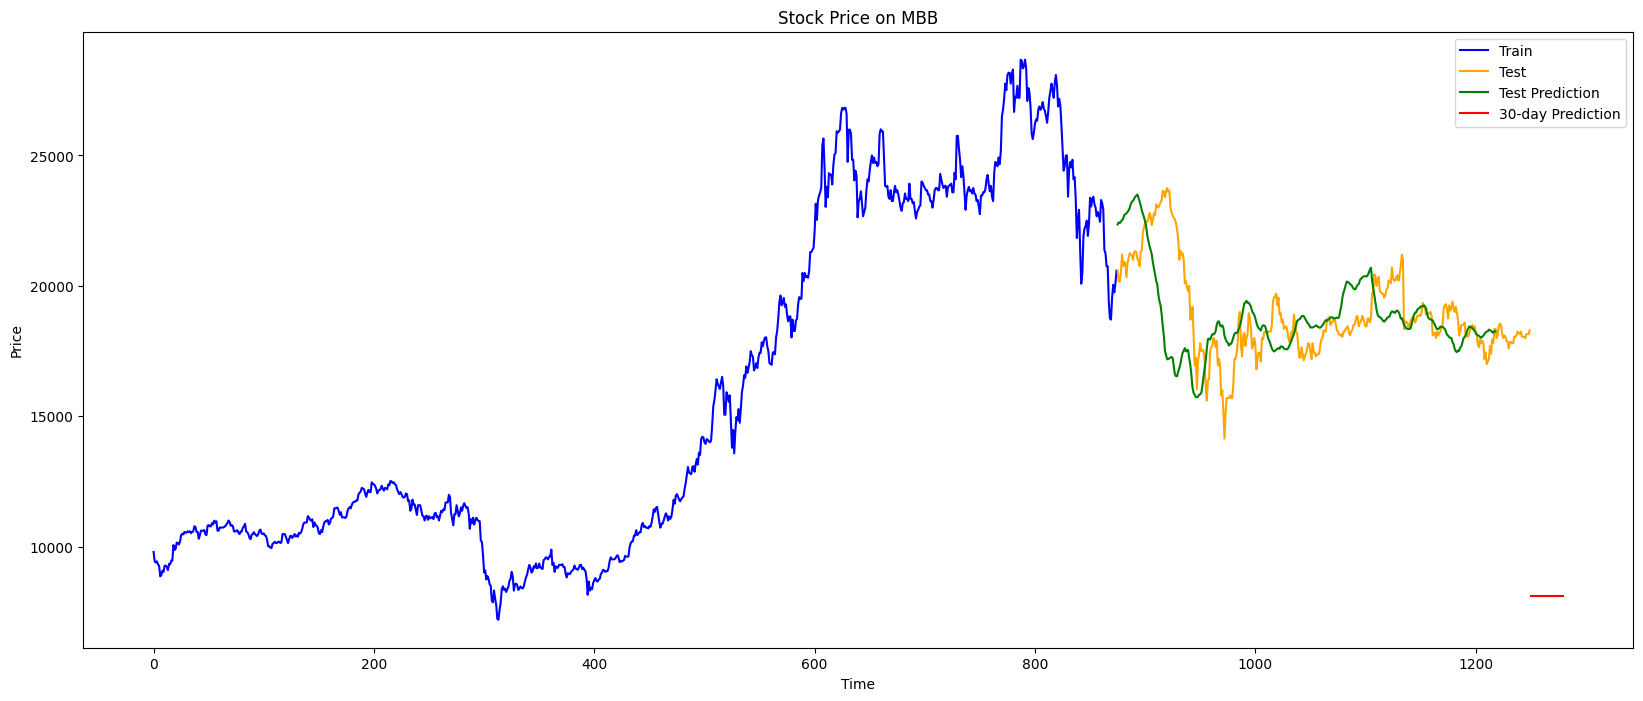

In [525]:

plt.figure(figsize=(20, 8))

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), color='blue', label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), color='orange', label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+ len(y_pred), step=1)  # Điều chỉnh độ dài của y_train_pred tương ứng với dữ liệu train
plt.plot(test_pred_index, scaler.inverse_transform(y_pred.reshape(-1, 1)), color='green', label='Test Prediction')

future_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(future_pred), step=1)
plt.plot(future_pred_index, scaler.inverse_transform(future_pred.reshape(-1, 1)).flatten(), color='red', label='Next 30 days Prediction')


plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price on MBB')
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()
